# Projeto 2: Respondendo Perguntas de Negócios na Área de Varejo

O objetivo é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

### Parte1: Obtenção do Dados


In [69]:
#Importando os pacotes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats


In [70]:
#Carregando os dados do CSV
varejo_df = pd.read_csv('dados/dataset.csv')

In [71]:
#Shape
shape = varejo_df.shape
print("Número de linhas:\t{}\nNúmero de Colunas:\t{}".format(shape[0],shape[1]))

Número de linhas:	9700
Número de Colunas:	11


In [72]:
#Amostra dos dados
varejo_df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Parte2: Exploração do Dados 
Nesta etapa, vamos analisar as variáveis estudadas, entendendo seus nomes, tipos, verificar se existem valores ausentes e compreender a distribuição estatística desses dados.

In [14]:
#Entendendo quais são as colunas existentes e seu tipo

display(varejo_df.dtypes)

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [16]:
#Verificando a existência de valores ausentes
varejo_df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [18]:
#Verificando a existência de valores duplicados
varejo_df[varejo_df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [22]:
#Entendo da distribuição estatística da variável valor_venda
varejo_df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [42]:
#Verificando a normalidade dos dados com o teste de Shapiro-Wilk
resultado_teste = stats.shapiro(varejo_df['Valor_Venda'])
valor_p = resultado_teste.pvalue
alpha = 0.05
if valor_p > alpha:
    print("A distribuição dos dados segue uma distribuição normal (p > alpha)")
else:
    print("A distribuição dos dados não segue uma distribuição normal (p <= alpha)")

A distribuição dos dados não segue uma distribuição normal (p <= alpha)


array([[<Axes: title={'center': 'Valor_Venda'}>]], dtype=object)

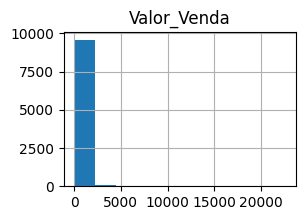

In [29]:
#Histograma do valor_venda
varejo_df.hist(figsize=(3,2))

## Pergunta1: Qual a cidade com maior valor de venda de produtos da categoria ' Office Supplies?

In [60]:
#Calcula os valores máximo

cidades_categoria = varejo_df[varejo_df['Categoria'] == 'Office Supplies']
cidades_venda = cidades_categoria.groupby('Cidade')['Valor_Venda'].sum()
cidades_maxima = cidades_venda.idxmax()
print(cidades_maxima)



New York City


## Pergunta2: Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras

In [80]:
#Vendas por data
vendas_data = varejo_df.groupby('Data_Pedido')['Valor_Venda'].sum()
vendas_data.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

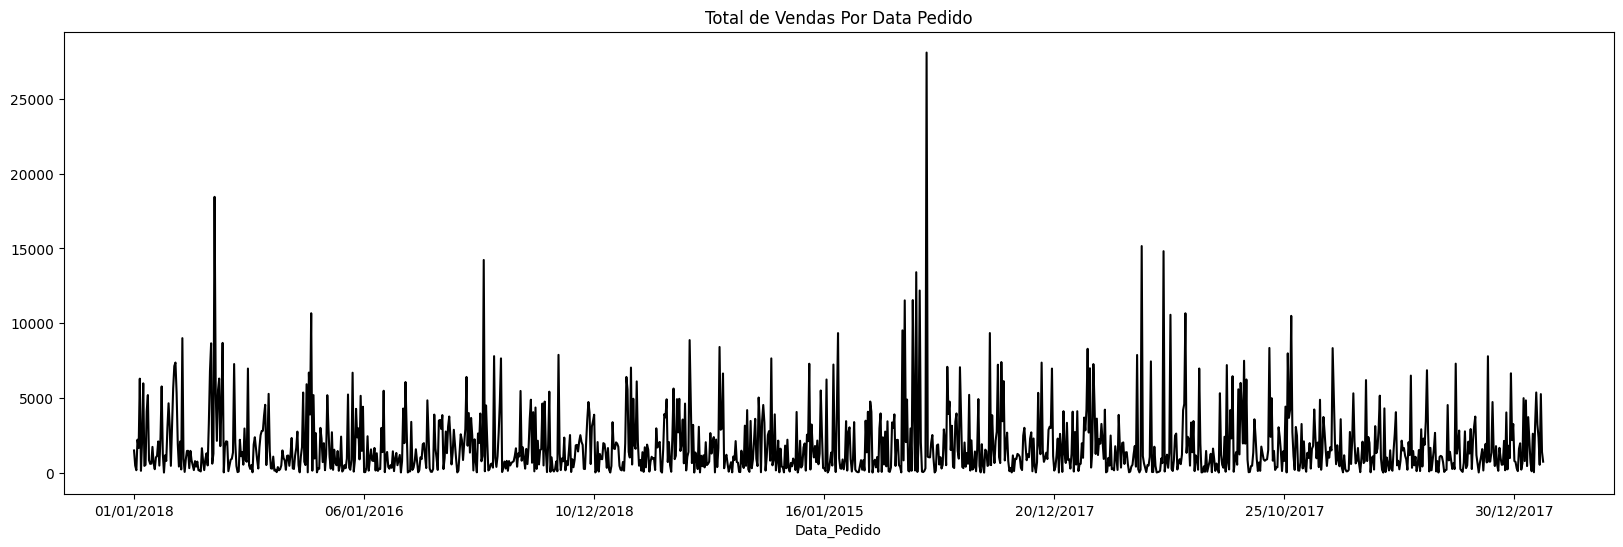

In [83]:
#Criando o gráfico
plt.figure(figsize = (20,6))
vendas_data.plot(x='Data_Pedido', y = 'Valor_Venda', color = 'k')
plt.title("Total de Vendas Por Data Pedido")
plt.show()
#Obs: Nessa análise estamos tratando a data pedido como variável categórica e não como série temporal.

## Pergunta3: Qual o total de vendas por Estado?
Demonstre esse resultado através do gráfico de barras


In [91]:
#Calculando o total de vendas por estado
vendas_estado =  varejo_df.groupby('Estado')['Valor_Venda'].sum().reset_index()
vendas_estado_df.head()

,Valor_Venda
Estado,
Alabama,19510.6400
Arizona,35272.6570
Arkansas,11673.8300
California,442927.0975
Colorado,31841.5980


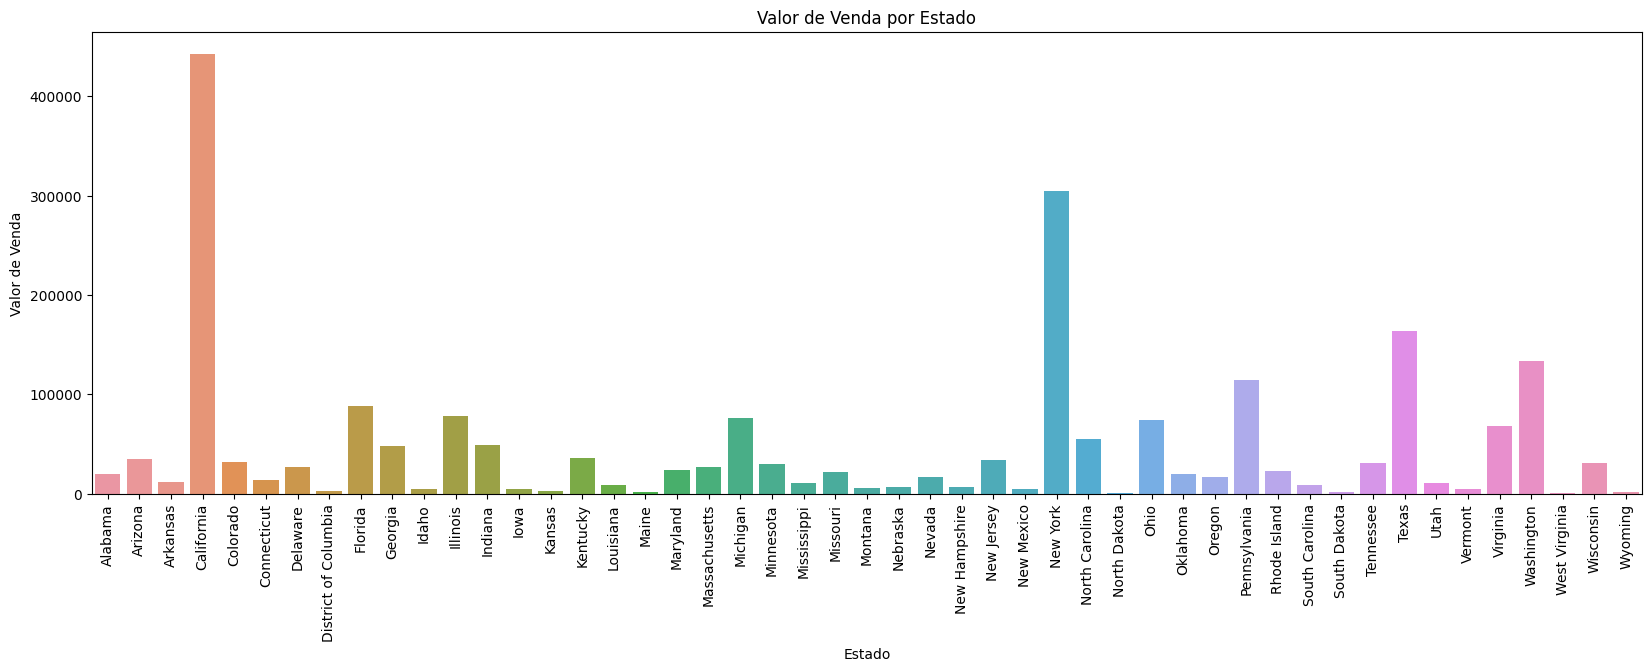

In [103]:
#Criando gráfico usando seaborn
plt.figure(figsize = (20,6))
sns.barplot(x='Estado', y='Valor_Venda', data=vendas_estado)
plt.xlabel('Estado')
plt.ylabel('Valor de Venda')
plt.title('Valor de Venda por Estado')
plt.xticks(rotation = 90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Pergunta4: Quais são as 10 Cidades com Maior Total de Vendas?
Demonstre esse resultado através do gráfico de barras 

In [111]:
vendas_cidade =  varejo_df.groupby('Cidade')['Valor_Venda'].sum().reset_index()
vendas_cidade_top10 = vendas_cidade.nlargest(10, 'Valor_Venda')
vendas_cidade_top10.head()

,Cidade,Valor_Venda
327,New York City,251749.219
265,Los Angeles,171654.633
450,Seattle,114725.478
436,San Francisco,107489.952
372,Philadelphia,107197.803


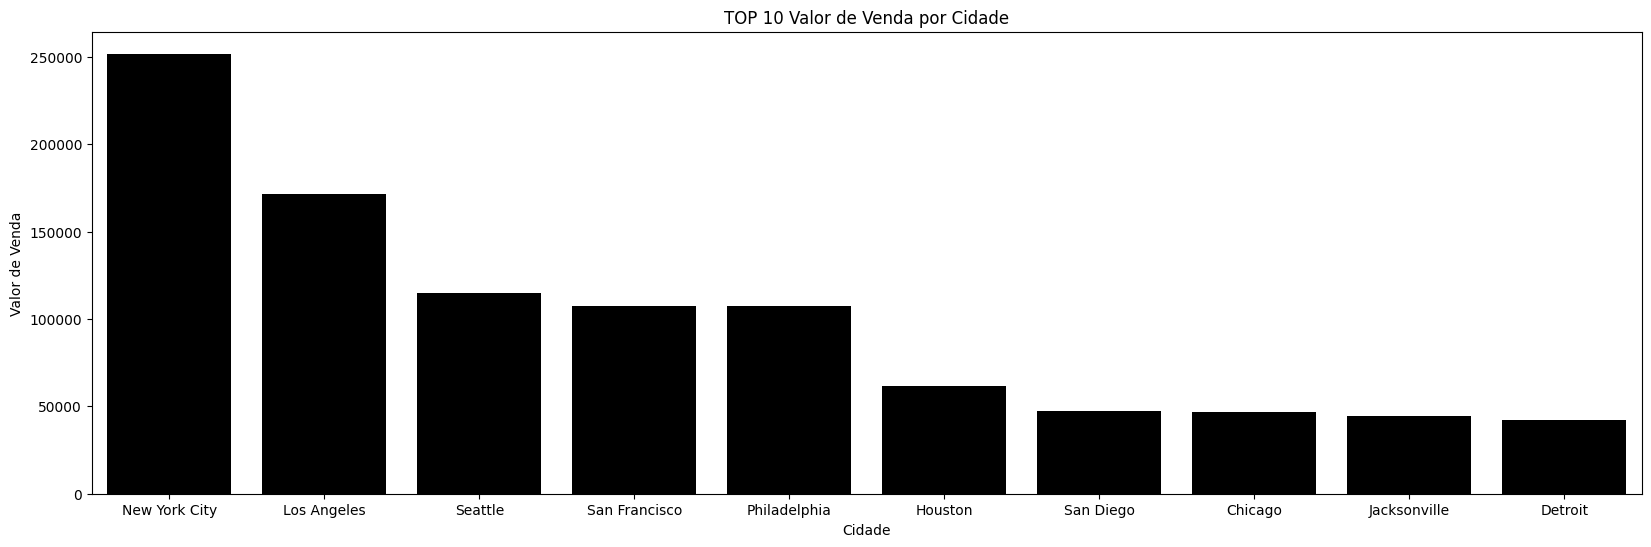

In [114]:
#Criando gráfico usando seaborn
plt.figure(figsize = (20,6))
sns.barplot(x='Cidade', y='Valor_Venda', data=vendas_cidade_top10, color = 'k')
plt.title('TOP 10 Valor de Venda por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Valor de Venda')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()